# Ejercicio 2

## a)

 Si el **curr_hp** es más chico, entonces el término *(**max_hp** * 3 - **curr_hp** * 2)* en la expresión del numerador será más grande, lo que hará que el valor del numerador en general sea más grande. Esto, a su vez, aumentará el valor de **capture_rate**.

Por lo tanto, si curr_hp es más chico, es más probable que se capture al pokemon si se mantienen constantes los demás factores (como el **catch_rate**, **ball_rate**, **status**, **noise**, etc.). Sin embargo, es importante tener en cuenta que el efecto del **curr_hp** en la tasa de captura puede ser mitigado por otros factores en la expresión, como el **catch_rate**, **ball_rate**, **status**, etc.

Esto que mencionamos podemos verlo a traves de 5 graficos de un pokemon tomado de ejemplo (Mewtwo) donde todos los valores que no sean la vida del pokemon seran constantes. De esta manera tendremos 5 graficos, uno con Mewtwo a 20 de vida, otro a 40 vida, otro a 60 de vida, otro a 80 de vida y finalmente otro a 100 de vida. 

In [81]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [82]:
factory = PokemonFactory("pokemon.json")
healths = [0.2, 0.4, 0.6, 0.8, 1]
capture_rates = []
std_errors = []

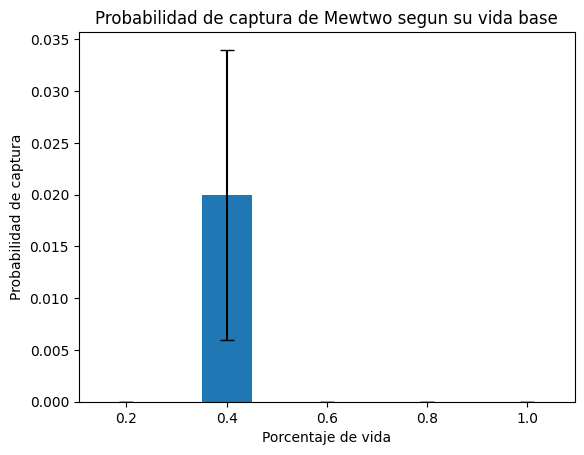

In [83]:
for health in healths:
    capture_attempts = []
    mewtwo = factory.create("mewtwo", 100, StatusEffect.NONE, health)
    for i in range(100):
        capture_attempts.append(attempt_catch(mewtwo, "pokeball")[0])
    
    capture_rate = sum(capture_attempts) / len(capture_attempts)
    capture_rates.append(capture_rate)
    std_error = np.std(capture_attempts) / np.sqrt(len(capture_attempts))
    std_errors.append(std_error)
    
#Creamos el data frame donde almacenamos todos los datos que se van a graficar
data = pd.DataFrame({'health': healths, 'capture_rate': capture_rates})

#Creamos el grafico de barras con las respectivas barras de errores
plt.bar(data['health'], data['capture_rate'], yerr=std_errors, capsize=5, width=0.1)
plt.title(f'Probabilidad de captura de Mewtwo segun su vida base')
plt.xlabel('Porcentaje de vida')
plt.ylabel('Probabilidad de captura')
plt.show()